In [38]:
from processing_comisiones import process_comissions_df
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
import plotly.graph_objects as go
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [39]:
df = process_comissions_df()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211493 entries, 0 to 211492
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   EDAD                     211493 non-null  int64 
 1   PLAN DE LA POLIZA        211493 non-null  object
 2   MODALIDAD DE LA POLIZA   211493 non-null  object
 3   MONEDA                   211493 non-null  object
 4   ENTIDAD                  211493 non-null  object
 5   SEXO                     211493 non-null  object
 6   FORMA DE VENTA           211493 non-null  object
 7   TIPO DIVIDENDO           211493 non-null  object
 8   NUMERO DE ASEGURADOS     211493 non-null  int64 
 9   PRIMA CEDIDA             211493 non-null  int64 
 10  COMISIONES DIRECTAS      211493 non-null  int64 
 11  FONDO DE INVERSIÓN       211493 non-null  int64 
 12  FONDO DE ADMINISTRACION  211493 non-null  int64 
 13  MONTO DE DIVIDENDOS      211493 non-null  int64 
 14  MONTO DE RESCATE    

In [40]:
cols = ['NUMERO DE ASEGURADOS', 'PRIMA CEDIDA', 'COMISIONES DIRECTAS', 'FONDO DE INVERSIÓN', 'FONDO DE ADMINISTRACION', 'MONTO DE DIVIDENDOS', 'MONTO DE RESCATE']
X = df[cols]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

labels = kmeans.labels_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
df.describe()

,EDAD,NUMERO DE ASEGURADOS,PRIMA CEDIDA,COMISIONES DIRECTAS,FONDO DE INVERSIÓN,FONDO DE ADMINISTRACION,MONTO DE DIVIDENDOS,MONTO DE RESCATE
count,211493.00,211493.00,211493.00,211493.00,211493.00,211493.00,211493.00,211493.00
mean,47.71,87.81,11429.07,62709.00,1892111.43,247409.62,8.88,291495.93
std,18.95,1003.38,90114.34,295899.94,15590646.68,2540255.09,9581.76,2557418.35
min,0.00,1.00,-433300.00,-1071441.00,-3685.00,-4670935.00,-3877252.00,-2382435.00
25%,34.00,2.00,0.00,75.00,0.00,0.00,0.00,0.00
50%,48.00,6.00,0.00,3422.00,0.00,0.00,0.00,0.00
75%,61.00,31.00,508.00,23650.00,2533.00,714.00,0.00,10570.00
max,121.00,82730.00,7768377.00,16474728.00,1300351438.00,315158398.00,2024442.00,320630241.00


In [42]:
stats = df.describe(include='all')
print(stats)
print(df.columns)

            EDAD PLAN DE LA POLIZA MODALIDAD DE LA POLIZA    MONEDA  \
count  211493.00            211493                 211493    211493   
unique       NaN                 6                     10         3   
top          NaN          Temporal            Tradicional  Nacional   
freq         NaN            101590                 112613    119916   
mean       47.71               NaN                    NaN       NaN   
std        18.95               NaN                    NaN       NaN   
min         0.00               NaN                    NaN       NaN   
25%        34.00               NaN                    NaN       NaN   
50%        48.00               NaN                    NaN       NaN   
75%        61.00               NaN                    NaN       NaN   
max       121.00               NaN                    NaN       NaN   

                ENTIDAD        SEXO          FORMA DE VENTA TIPO DIVIDENDO  \
count             211493     211493                  211493         2

In [43]:
for col in cols:
    print(f'Estadística descriptiva para la columna "{col}":')
    print(df[col].describe())
    print('\n')

Estadística descriptiva para la columna "NUMERO DE ASEGURADOS":
count   211493.00
mean        87.81
std       1003.38
min          1.00
25%          2.00
50%          6.00
75%         31.00
max      82730.00
Name: NUMERO DE ASEGURADOS, dtype: float64


Estadística descriptiva para la columna "PRIMA CEDIDA":
count    211493.00
mean      11429.07
std       90114.34
min     -433300.00
25%           0.00
50%           0.00
75%         508.00
max     7768377.00
Name: PRIMA CEDIDA, dtype: float64


Estadística descriptiva para la columna "COMISIONES DIRECTAS":
count     211493.00
mean       62709.00
std       295899.94
min     -1071441.00
25%           75.00
50%         3422.00
75%        23650.00
max     16474728.00
Name: COMISIONES DIRECTAS, dtype: float64


Estadística descriptiva para la columna "FONDO DE INVERSIÓN":
count       211493.00
mean       1892111.43
std       15590646.68
min          -3685.00
25%              0.00
50%              0.00
75%           2533.00
max     1300351438.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211493 entries, 0 to 211492
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   EDAD                     211493 non-null  int64 
 1   PLAN DE LA POLIZA        211493 non-null  object
 2   MODALIDAD DE LA POLIZA   211493 non-null  object
 3   MONEDA                   211493 non-null  object
 4   ENTIDAD                  211493 non-null  object
 5   SEXO                     211493 non-null  object
 6   FORMA DE VENTA           211493 non-null  object
 7   TIPO DIVIDENDO           211493 non-null  object
 8   NUMERO DE ASEGURADOS     211493 non-null  int64 
 9   PRIMA CEDIDA             211493 non-null  int64 
 10  COMISIONES DIRECTAS      211493 non-null  int64 
 11  FONDO DE INVERSIÓN       211493 non-null  int64 
 12  FONDO DE ADMINISTRACION  211493 non-null  int64 
 13  MONTO DE DIVIDENDOS      211493 non-null  int64 
 14  MONTO DE RESCATE    

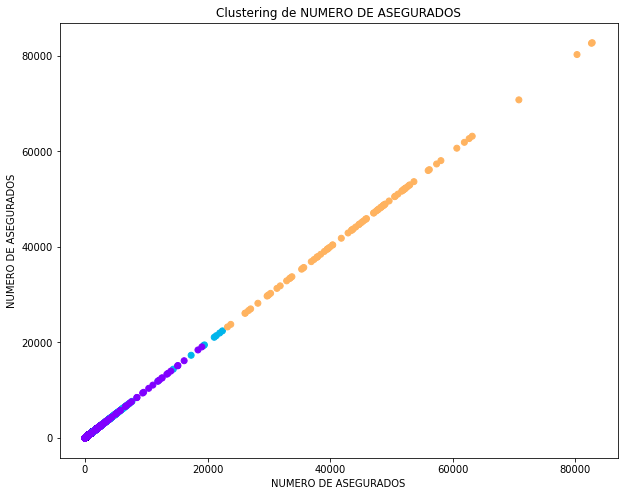

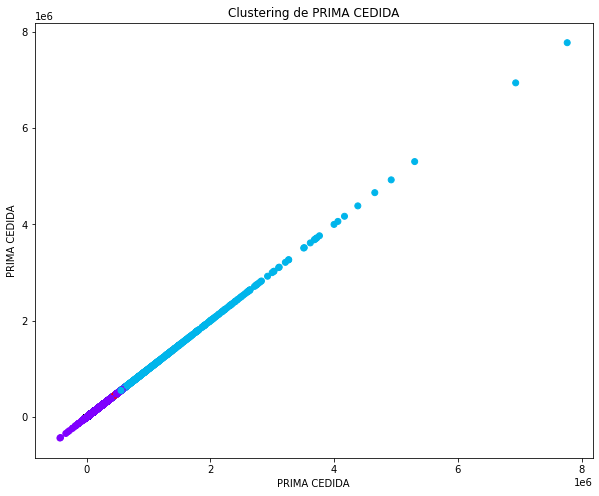

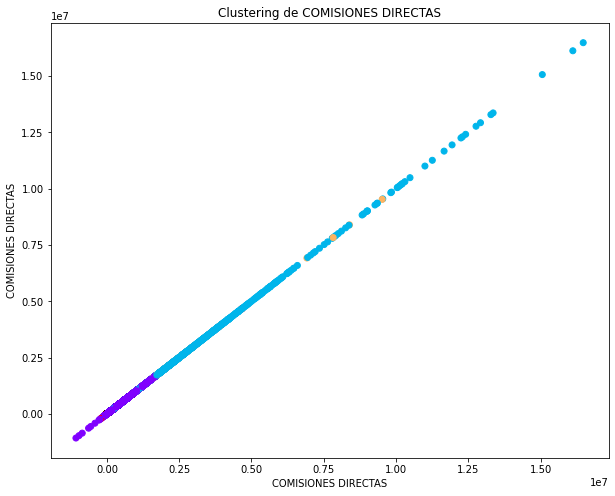

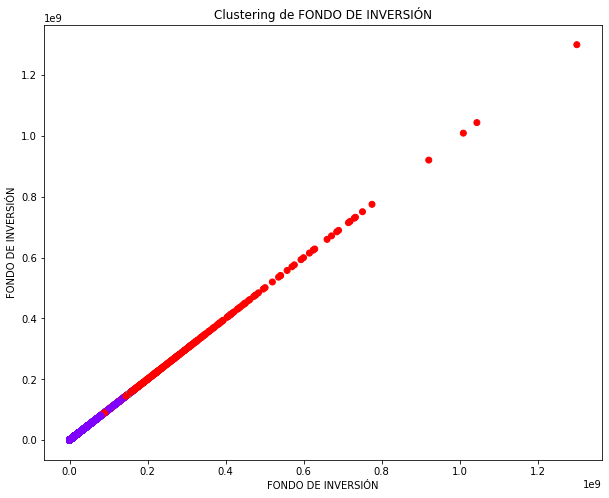

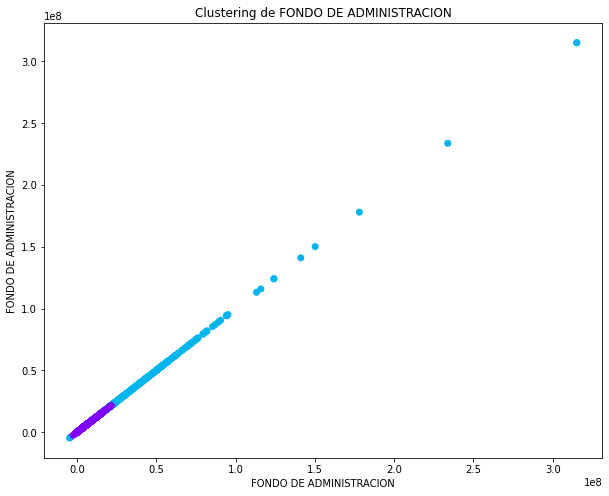

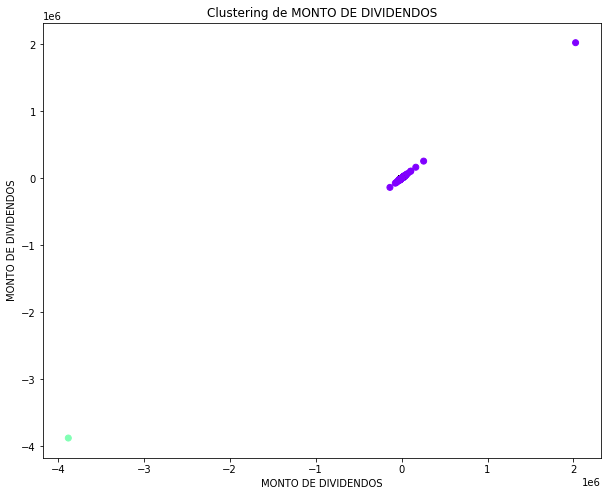

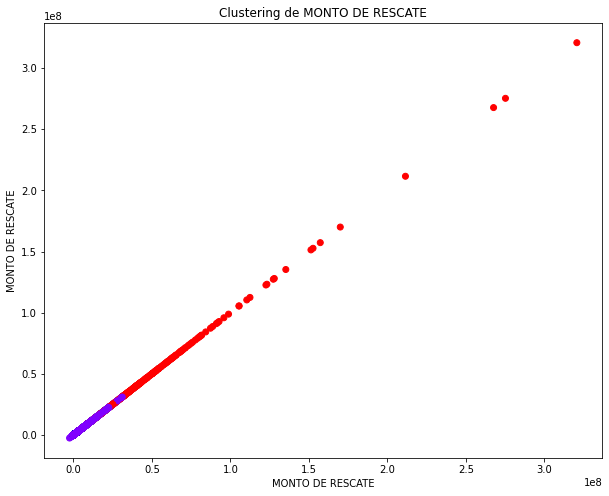

In [45]:
for col in cols:
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.scatter(df[col], df[col], c=labels, cmap='rainbow')
    ax.set_xlabel(col)
    ax.set_ylabel(col)
    ax.set_title(f'Clustering de {col}')
    plt.show()

In [46]:
agg_clustering = AgglomerativeClustering(n_clusters=5)

# Ajustar el modelo a los datos
agg_clustering.fit(df[cols])

# Obtener las etiquetas de los clusters asignados a cada punto
labels = agg_clustering.labels_

# Visualizar los resultados
for col in cols:
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.scatter(df[col], df['EDAD'], c=labels, cmap='rainbow')
    ax.set_xlabel(col)
    ax.set_ylabel('Edad')
    ax.set_title(f'Clustering de Edad contra {col}')
    plt.show()


: 

: 

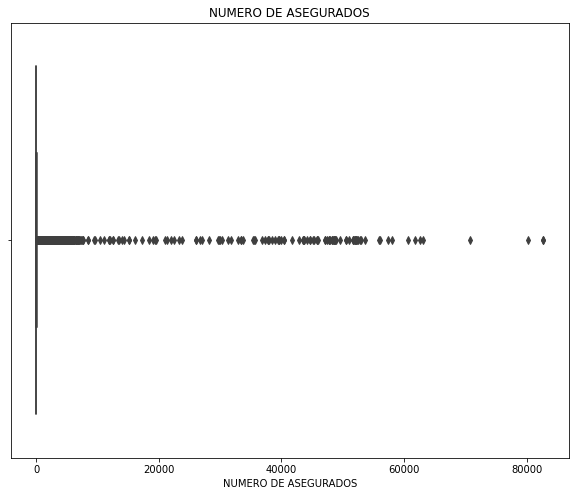

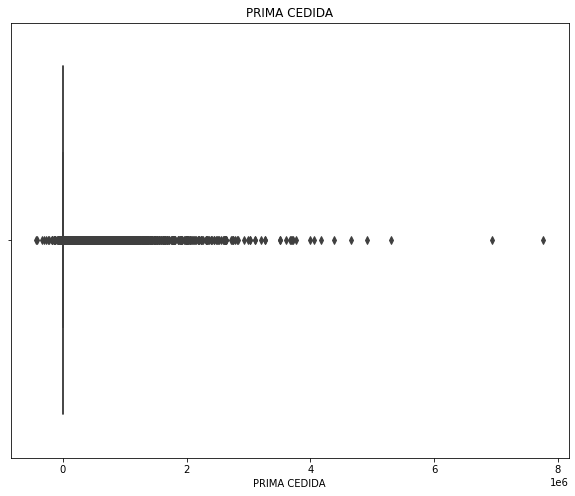

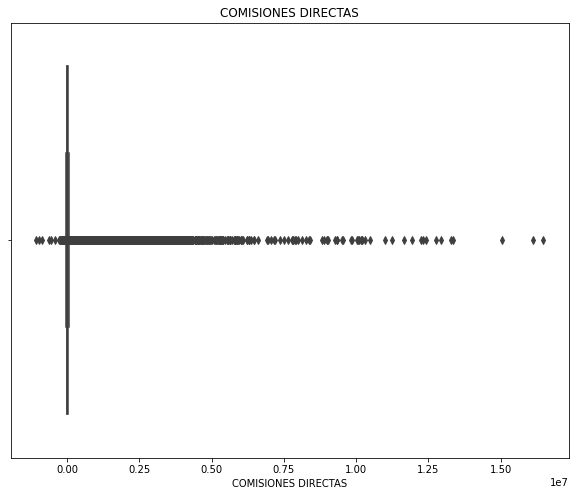

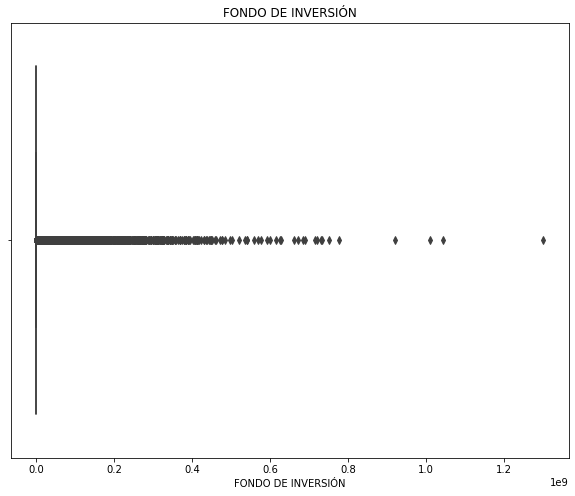

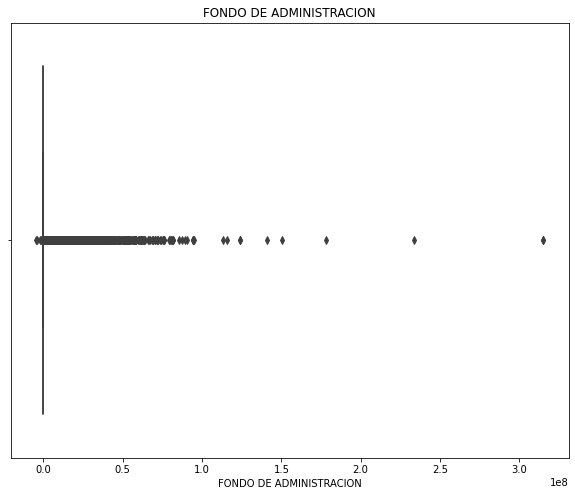

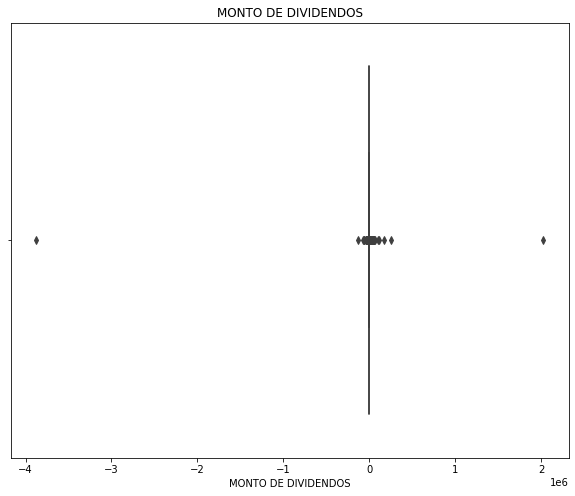

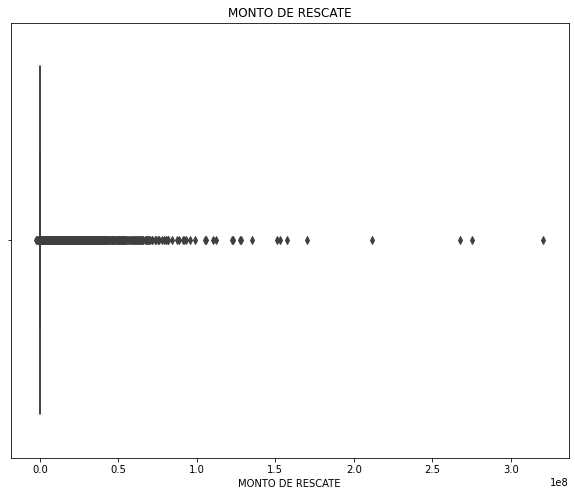

In [ ]:
for col in cols:
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(col)
    plt.show()

In [ ]:
cols = pd.DataFrame(cols)